<a href="https://colab.research.google.com/github/ayyucedemirbas/machine_learning_algorithms/blob/master/Capstone_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Capstone Project
## Image classifier for the SVHN dataset
### Instructions

In this notebook, you will create a neural network that classifies real-world images digits. You will use concepts from throughout this course in building, training, testing, validating and saving your Tensorflow classifier model.

This project is peer-assessed. Within this notebook you will find instructions in each section for how to complete the project. Pay close attention to the instructions as the peer review will be carried out according to a grading rubric that checks key parts of the project instructions. Feel free to add extra cells into the notebook as required.

### How to submit

When you have completed the Capstone project notebook, you will submit a pdf of the notebook for peer review. First ensure that the notebook has been fully executed from beginning to end, and all of the cell outputs are visible. This is important, as the grading rubric depends on the reviewer being able to view the outputs of your notebook. Save the notebook as a pdf (you could download the notebook with File -> Download .ipynb, open the notebook locally, and then File -> Download as -> PDF via LaTeX), and then submit this pdf for review.

### Let's get started!

We'll start by running some imports, and loading the dataset. For this project you are free to make further imports throughout the notebook as you wish. 

In [3]:
import tensorflow as tf
from scipy.io import loadmat

For the capstone project, you will use the [SVHN dataset](http://ufldl.stanford.edu/housenumbers/). This is an image dataset of over 600,000 digit images in all, and is a harder dataset than MNIST as the numbers appear in the context of natural scene images. SVHN is obtained from house numbers in Google Street View images.

* Y. Netzer, T. Wang, A. Coates, A. Bissacco, B. Wu and A. Y. Ng. "Reading Digits in Natural Images with Unsupervised Feature Learning". NIPS Workshop on Deep Learning and Unsupervised Feature Learning, 2011.

The train and test datasets required for this project can be downloaded from [here](http://ufldl.stanford.edu/housenumbers/train.tar.gz) and [here](http://ufldl.stanford.edu/housenumbers/test.tar.gz). Once unzipped, you will have two files: `train_32x32.mat` and `test_32x32.mat`. You should store these files in Drive for use in this Colab notebook.

Your goal is to develop an end-to-end workflow for building, training, validating, evaluating and saving a neural network that classifies a real-world image into one of ten classes.

In [4]:
# Run this cell to connect to your Drive folder

from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [6]:
# Load the dataset from your Drive folder

train = loadmat('/content/gdrive/My Drive/SVHN/train_32x32.mat')
test = loadmat('/content/gdrive/My Drive/SVHN/test_32x32.mat')

Both `train` and `test` are dictionaries with keys `X` and `y` for the input images and labels respectively.

## 1. Inspect and preprocess the dataset
* Extract the training and testing images and labels separately from the train and test dictionaries loaded for you.
* Select a random sample of images and corresponding labels from the dataset (at least 10), and display them in a figure.
* Convert the training and test images to grayscale by taking the average across all colour channels for each pixel. _Hint: retain the channel dimension, which will now have size 1._
* Select a random sample of the grayscale images and corresponding labels from the dataset (at least 10), and display them in a figure.

In [7]:
import numpy as np

train_images = np.array(train['X'])
test_images = np.array(test['X'])

train_labels = np.array(train['y'])
test_labels = np.array(test['y'])

In [8]:
train_images = np.moveaxis(train_images, -1, 0)
test_images = np.moveaxis(test_images, -1, 0)

In [9]:
from tensorflow.keras.preprocessing.image import load_img
from tensorflow.keras.preprocessing import image
import matplotlib.pyplot as plt

import pandas as pd
def plot_images(img, labels, nrows, ncols):
    """ Plot nrows x ncols images
    """
    _, axes = plt.subplots(nrows, ncols)
    for i, ax in enumerate(axes.flat): 
        if img[i].shape == (32, 32, 3):
            ax.imshow(img[i])
        else:
            ax.imshow(img[i,:,:,0])
        
        print(labels[i])
        ax.axis('off')

[1]
[9]
[2]
[3]
[2]
[5]
[9]
[3]
[3]
[1]


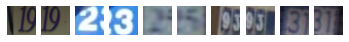

In [10]:
plot_images(train_images, train_labels, 1, 10)

In [11]:
train_images = train_images.astype('float64')
test_images = test_images.astype('float64')

train_labels = train_labels.astype('int64')
test_labels = test_labels.astype('int64')

[1]
[9]
[2]
[3]
[2]
[5]
[9]
[3]
[3]
[1]


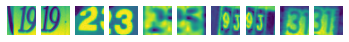

In [12]:
def convert(images):
    return np.expand_dims(np.dot(images, [0.2990, 0.5870, 0.1140]), axis=3)

train_images = convert(train_images).astype(np.float32)
test_images = convert(test_images).astype(np.float32)
plot_images(train_images, train_labels, 1, 10)


In [10]:
train_images[5398].shape


(32, 32, 1)

## 2. MLP neural network classifier
* Build an MLP classifier model using the Sequential API. Your model should use only Flatten and Dense layers, with the final layer having a 10-way softmax output. 
* You should design and build the model yourself. Feel free to experiment with different MLP architectures. _Hint: to achieve a reasonable accuracy you won't need to use more than 4 or 5 layers._
* Print out the model summary (using the summary() method)
* Compile and train the model (we recommend a maximum of 30 epochs), making use of both training and validation sets during the training run. 
* Your model should track at least one appropriate metric, and use at least two callbacks during training, one of which should be a ModelCheckpoint callback.
* As a guide, you should aim to achieve a final categorical cross entropy training loss of less than 1.0 (the validation loss might be higher).
* Plot the learning curves for loss vs epoch and accuracy vs epoch for both training and validation sets.
* Compute and display the loss and accuracy of the trained model on the test set.

In [45]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten
model = Sequential([
                    
        Flatten(input_shape=(32, 32, 1)),
        Dense(256, activation="relu"),
        
        Dense(256, activation="relu"), 
        Dense(64, activation="relu"),
        Dense(64, activation="relu"),
        
        Dense(11, activation= "softmax") #this layer should have 11 units instead of 10. Because labels of the dataset contains 10 number.
        #11 units mean [0,11), so that value range includes 10.
        
    ])

In [46]:
model.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_5 (Flatten)          (None, 1024)              0         
_________________________________________________________________
dense_11 (Dense)             (None, 256)               262400    
_________________________________________________________________
dense_12 (Dense)             (None, 256)               65792     
_________________________________________________________________
dense_13 (Dense)             (None, 64)                16448     
_________________________________________________________________
dense_14 (Dense)             (None, 64)                4160      
_________________________________________________________________
dense_15 (Dense)             (None, 11)                715       
Total params: 349,515
Trainable params: 349,515
Non-trainable params: 0
________________________________________________

In [47]:
adam = tf.keras.optimizers.Adam()
model.compile(optimizer=adam, loss = 'sparse_categorical_crossentropy', metrics= ['acc'] )

In [48]:
from tensorflow.keras.callbacks import ModelCheckpoint
checkpoint_path= 'model_checkpoints/checkpoint'
checkpoint= ModelCheckpoint(filepath=checkpoint_path,
                           frequency='epoch',
                           save_weights_only=True,
                           verbose=1)

In [49]:
def get_callbacks():
    early_stopping= tf.keras.callbacks.EarlyStopping(mode="min", patience=10)
    #learning_rate_reduction =tf.keras.callbacks.ReduceLROnPlateau(factor=0.2, patience=20)
    
    return early_stopping
    #, learning_rate_reduction

In [50]:
early_stopping = get_callbacks()

In [51]:
history = model.fit(train_images, train_labels, epochs=30, validation_split=0.1, callbacks=[early_stopping, checkpoint])


Epoch 1/30
2054/2061 [============================>.] - ETA: 0s - loss: 2.8441 - acc: 0.3364
Epoch 00001: saving model to model_checkpoints/checkpoint
2061/2061 [==============================] - 9s 4ms/step - loss: 2.8397 - acc: 0.3370 - val_loss: 1.3982 - val_acc: 0.5495
Epoch 2/30
2051/2061 [============================>.] - ETA: 0s - loss: 1.3994 - acc: 0.5503
Epoch 00002: saving model to model_checkpoints/checkpoint
2061/2061 [==============================] - 9s 4ms/step - loss: 1.3985 - acc: 0.5507 - val_loss: 1.2157 - val_acc: 0.6204
Epoch 3/30
2061/2061 [==============================] - ETA: 0s - loss: 1.2467 - acc: 0.6109
Epoch 00003: saving model to model_checkpoints/checkpoint
2061/2061 [==============================] - 9s 4ms/step - loss: 1.2467 - acc: 0.6109 - val_loss: 1.1936 - val_acc: 0.6222
Epoch 4/30
2060/2061 [============================>.] - ETA: 0s - loss: 1.1524 - acc: 0.6425
Epoch 00004: saving model to model_checkpoints/checkpoint
2061/2061 [================

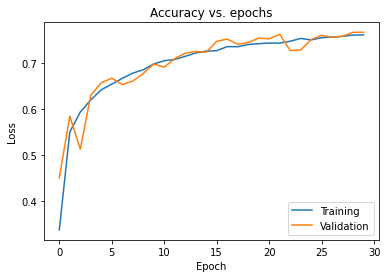

In [55]:

import matplotlib.pyplot as plt
try:
    plt.plot(history.history['accuracy'])
    plt.plot(history.history['val_accuracy'])
except KeyError:
    plt.plot(history.history['acc'])
    plt.plot(history.history['val_acc'])
plt.title('Accuracy vs. epochs')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Training', 'Validation'], loc='lower right')
plt.show()

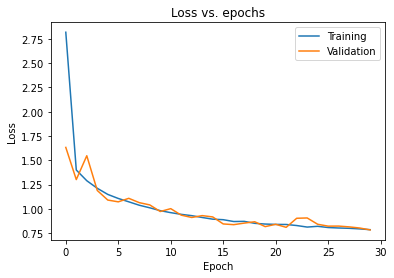

In [56]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Loss vs. epochs')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Training', 'Validation'], loc='upper right')
plt.show()


## 3. CNN neural network classifier
* Build a CNN classifier model using the Sequential API. Your model should use the Conv2D, MaxPool2D, BatchNormalization, Flatten, Dense and Dropout layers. The final layer should again have a 10-way softmax output. 
* You should design and build the model yourself. Feel free to experiment with different CNN architectures. _Hint: to achieve a reasonable accuracy you won't need to use more than 2 or 3 convolutional layers and 2 fully connected layers.)_
* The CNN model should use fewer trainable parameters than your MLP model.
* Compile and train the model (we recommend a maximum of 30 epochs), making use of both training and validation sets during the training run.
* Your model should track at least one appropriate metric, and use at least two callbacks during training, one of which should be a ModelCheckpoint callback.
* You should aim to beat the MLP model performance with fewer parameters!
* Plot the learning curves for loss vs epoch and accuracy vs epoch for both training and validation sets.
* Compute and display the loss and accuracy of the trained model on the test set.

In [29]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Conv2D, BatchNormalization, Dropout, MaxPooling2D
model_cnn = Sequential([
        
        Conv2D(32, (5,5), activation='relu', padding="same", input_shape=(32,32,1)),
        BatchNormalization(),
        Conv2D(64, (5,5), activation='relu', padding="same"),
        
        Dropout(0.2),
        MaxPool2D((2,2), strides=2),
        
        Dense(32, activation='relu'),
        Flatten(),
        Dense(11, activation='softmax')

])

In [30]:
model_cnn.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_6 (Conv2D)            (None, 32, 32, 32)        832       
_________________________________________________________________
batch_normalization_3 (Batch (None, 32, 32, 32)        128       
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 32, 32, 64)        51264     
_________________________________________________________________
dropout_3 (Dropout)          (None, 32, 32, 64)        0         
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 16, 16, 64)        0         
_________________________________________________________________
dense_4 (Dense)              (None, 16, 16, 32)        2080      
_________________________________________________________________
flatten_3 (Flatten)          (None, 8192)             

In [31]:
adam = tf.keras.optimizers.Adam()
model_cnn.compile(optimizer=adam, loss = 'sparse_categorical_crossentropy', metrics= ['acc'] )

In [18]:
from tensorflow.keras.callbacks import ModelCheckpoint
checkpoint_path= 'model_cnn_checkpoints/checkpoint'
checkpoint= ModelCheckpoint(filepath=checkpoint_path,
                           frequency='epoch',
                           save_weights_only=True,
                           verbose=1)

In [23]:
def get_callbacks():
    early_stopping= tf.keras.callbacks.EarlyStopping(mode="min", patience=5)
    #learning_rate_reduction =tf.keras.callbacks.ReduceLROnPlateau(factor=0.2, patience=20)
    
    return early_stopping
    #, learning_rate_reduction

In [24]:
early_stopping = get_callbacks()

In [32]:
history = model_cnn.fit(train_images, train_labels, epochs=10, validation_split=0.1, callbacks=[checkpoint, early_stopping], verbose=1)

Epoch 1/10
2061/2061 [==============================] - ETA: 0s - loss: 0.6068 - acc: 0.8190
Epoch 00001: saving model to model_cnn_checkpoints/checkpoint
2061/2061 [==============================] - 664s 322ms/step - loss: 0.6068 - acc: 0.8190 - val_loss: 0.5050 - val_acc: 0.8609
Epoch 2/10
2061/2061 [==============================] - ETA: 0s - loss: 0.4099 - acc: 0.8804
Epoch 00002: saving model to model_cnn_checkpoints/checkpoint
2061/2061 [==============================] - 660s 320ms/step - loss: 0.4099 - acc: 0.8804 - val_loss: 0.4243 - val_acc: 0.8737
Epoch 3/10
2061/2061 [==============================] - ETA: 0s - loss: 0.3567 - acc: 0.8966
Epoch 00003: saving model to model_cnn_checkpoints/checkpoint
2061/2061 [==============================] - 664s 322ms/step - loss: 0.3567 - acc: 0.8966 - val_loss: 0.4272 - val_acc: 0.8736
Epoch 4/10
2061/2061 [==============================] - ETA: 0s - loss: 0.3175 - acc: 0.9060
Epoch 00004: saving model to model_cnn_checkpoints/checkpoint

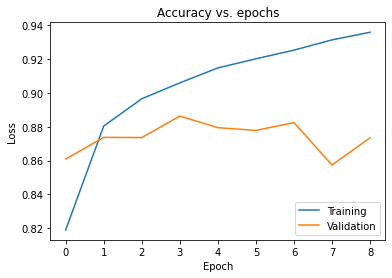

In [33]:
import matplotlib.pyplot as plt
try:
    plt.plot(history.history['accuracy'])
    plt.plot(history.history['val_accuracy'])
except KeyError:
    plt.plot(history.history['acc'])
    plt.plot(history.history['val_acc'])
plt.title('Accuracy vs. epochs')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Training', 'Validation'], loc='lower right')
plt.show()

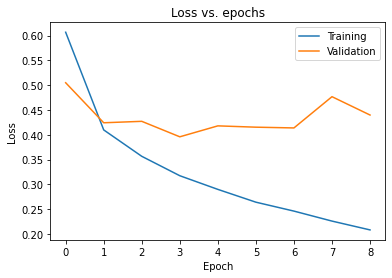

In [34]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Loss vs. epochs')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Training', 'Validation'], loc='upper right')
plt.show()

In [37]:
test_loss, test_acc = model_cnn.evaluate(test_images, test_labels, verbose=0)
print("Test loss: {:.3f}\nTest accuracy: {:.2f}%".format(test_loss, 100 * test_acc))

Test loss: 0.539
Test accuracy: 84.97%


## 4. Get model predictions
* Load the best weights for the MLP and CNN models that you saved during the training run.
* Randomly select 5 images and corresponding labels from the test set and display the images with their labels.
* Alongside the image and label, show each model’s predictive distribution as a bar chart, and the final model prediction given by the label with maximum probability.

In [52]:
!ls -al

total 28
drwxr-xr-x 1 root root 4096 Oct 21 12:42 .
drwxr-xr-x 1 root root 4096 Oct 21 10:04 ..
drwxr-xr-x 1 root root 4096 Oct 14 16:32 .config
drwx------ 5 root root 4096 Oct 21 10:19 gdrive
drwxr-xr-x 2 root root 4096 Oct 21 12:52 model_checkpoints
drwxr-xr-x 2 root root 4096 Oct 21 12:29 model_cnn_checkpoints
drwxr-xr-x 1 root root 4096 Oct 14 16:31 sample_data


In [53]:
! ls -al model_checkpoints

total 4120
drwxr-xr-x 2 root root    4096 Oct 21 12:52 .
drwxr-xr-x 1 root root    4096 Oct 21 12:42 ..
-rw-r--r-- 1 root root      77 Oct 21 12:52 checkpoint
-rw-r--r-- 1 root root 4198633 Oct 21 12:52 checkpoint.data-00000-of-00001
-rw-r--r-- 1 root root    2429 Oct 21 12:52 checkpoint.index


In [54]:
! ls -al model_cnn_checkpoints

total 1716
drwxr-xr-x 2 root root    4096 Oct 21 12:29 .
drwxr-xr-x 1 root root    4096 Oct 21 12:42 ..
-rw-r--r-- 1 root root      77 Oct 21 12:29 checkpoint
-rw-r--r-- 1 root root 1737452 Oct 21 12:29 checkpoint.data-00000-of-00001
-rw-r--r-- 1 root root    2529 Oct 21 12:29 checkpoint.index


In [96]:
def get_test_accuracy(model, x_test, y_test):
    test_loss, test_acc = model.evaluate(x=x_test, y=y_test, verbose=0)
    print('accuracy: {acc:0.3f}'.format(acc=test_acc))
    return test_acc

In [69]:
#same as above
def get_new_model():
  new_model = Sequential([
                    
        Flatten(input_shape=(32, 32, 1)),
        Dense(256, activation="relu"),
        
        Dense(256, activation="relu"), 
        Dense(64, activation="relu"),
        Dense(64, activation="relu"),
        
        Dense(11, activation= "softmax") 
        
    ])
  new_model.compile(optimizer='adam',
                  loss='sparse_categorical_crossentropy',
                  metrics=['acc'])
  return new_model


In [76]:
def get_new_cnn_model():
  new_model_cnn = Sequential([
        
        Conv2D(32, (5,5), activation='relu', padding="same", input_shape=(32,32,1)),
        BatchNormalization(),
        Conv2D(64, (5,5), activation='relu', padding="same"),
        
        Dropout(0.2),
        MaxPool2D((2,2), strides=2),
        
        Dense(32, activation='relu'),
        Flatten(),
        Dense(11, activation='softmax')])
  new_model_cnn.compile(optimizer='adam',
                  loss='sparse_categorical_crossentropy',
                  metrics=['acc'])
  return new_model_cnn

  

In [71]:
new_model=get_new_model()
new_model.summary()

Model: "sequential_8"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_9 (Flatten)          (None, 1024)              0         
_________________________________________________________________
dense_28 (Dense)             (None, 256)               262400    
_________________________________________________________________
dense_29 (Dense)             (None, 256)               65792     
_________________________________________________________________
dense_30 (Dense)             (None, 64)                16448     
_________________________________________________________________
dense_31 (Dense)             (None, 64)                4160      
_________________________________________________________________
dense_32 (Dense)             (None, 11)                715       
Total params: 349,515
Trainable params: 349,515
Non-trainable params: 0
________________________________________________

In [77]:
new_model_cnn= get_new_cnn_model()
new_model_cnn.summary()

Model: "sequential_11"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_14 (Conv2D)           (None, 32, 32, 32)        832       
_________________________________________________________________
batch_normalization_7 (Batch (None, 32, 32, 32)        128       
_________________________________________________________________
conv2d_15 (Conv2D)           (None, 32, 32, 64)        51264     
_________________________________________________________________
dropout_7 (Dropout)          (None, 32, 32, 64)        0         
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 16, 16, 64)        0         
_________________________________________________________________
dense_37 (Dense)             (None, 16, 16, 32)        2080      
_________________________________________________________________
flatten_12 (Flatten)         (None, 8192)            

In [97]:
new_model.load_weights(checkpoint_path)
model_accuracy = get_test_accuracy(new_model, test_images, test_labels)

accuracy: 0.729


In [79]:
checkpoint_path_cnn= 'model_cnn_checkpoints/checkpoint'

In [98]:
new_model_cnn.load_weights(checkpoint_path_cnn)
cnn_model_accuracy=get_test_accuracy(new_model_cnn, test_images, test_labels)

accuracy: 0.850


[5]
[2]
[1]
[10]
[6]
[1]
[9]
[1]
[1]
[8]


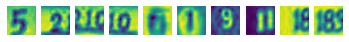

In [81]:
plot_images(test_images, test_labels, 1, 10)

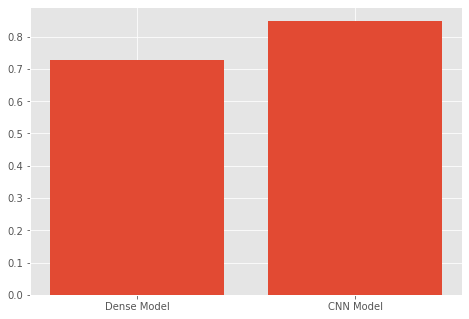

In [104]:
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
models = ['Dense Model', 'CNN Model']
accs = [model_accuracy, cnn_model_accuracy]
ax.bar(models,accs)
plt.show()